**Title**: Classification on a Real Life Dataset

**Data Set**: BreastTissue.csv

**Data Source**: https://archive.ics.uci.edu/ml/datasets/Breast+Tissue#

In this notebook, we're going to do another classification exercise.

This time, I have a notebook whose code and analyses are incomplete(by design), and I would like to recruit your help to complete it. 

Thankfully, I have some helpful comments to guide you along the line. This assessment will call on all the skills you have learnt in both Python and ML so far, in addition to your attention to detail.

In this classification exercise the target variable is called "class". This is the variable we're trying to predict based on the values of the other columns.

The dataset is contained in a csv filed called "BreastTissue.csv".

At the end of this exercise, write a short reflection to discuss the relative performance of both models. You can use the confusion matrix as reference to discuss how well the algorithms do at predicting various classes. You may write the reflection in markdown at the end of the notebook. You have the liberty to make informed decisions at all points in this notebook, provided you provide comments to justify them.

Enjoy!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

Load the dataset into a dataframe

In [6]:
df = pd.read_csv("BreastTissue.csv")

In [8]:
df.columns

Index(['Case #', 'Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP',
       'DR', 'P'],
      dtype='object')

Renaming the columns

In [10]:
new_cols = ['case_number', 'class', 'i0', 'pa500', 'hfs', 'da', 'area', 'a_da', 'max_ip',
       'dr','p']
df.columns = new_cols

In [11]:
df.columns

Index(['case_number', 'class', 'i0', 'pa500', 'hfs', 'da', 'area', 'a_da',
       'max_ip', 'dr', 'p'],
      dtype='object')

## Classes 

1. car (carcinoma)
2. fad (fibro-adenoma)
3. mas (mastopathy)
4. gla (glandular)
5. con (connective) 
6. adi (adipose)

In [14]:
##drop the case_number column
##omit the axis keyword
df.drop(columns="case_number", inplace=True)

In [15]:
df.columns

Index(['class', 'i0', 'pa500', 'hfs', 'da', 'area', 'a_da', 'max_ip', 'dr',
       'p'],
      dtype='object')

In [16]:
df.sample(5)

,class,i0,pa500,hfs,da,area,a_da,max_ip,dr,p
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
5,car,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
14,car,485.668805,0.230209,0.134041,253.893699,8135.968359,32.044783,64.855446,245.470531,541.363975
61,gla,216.413257,0.117810,0.068417,53.599600,280.445486,5.232231,22.790535,48.512974,215.372920


In [27]:
## In the columnn "class", there are 6 variables
## In this function, we are merging (fad)fibro-adenoma,(mas) mastopathy and (gla)glandular
## into a new class called "fmg" and maintaining all the rest as is
## Correct the code below that aims to do that
def create_new_class_fmg(col):
    variablesToMerge = ["fad", "mas", "gla"]
    
    if (col in variablesToMerge):
        return "fmg"
    else:
        return col

In [28]:
for col in ["fad", "mas", "gla","car"]:
    print(create_new_class_fmg(col))

fmg
fmg
fmg
car


In [30]:
df["new_class"] = df["class"].apply(create_new_class_fmg)

In [31]:
df.sample(10)

,class,i0,pa500,hfs,da,area,a_da,max_ip,dr,p,new_class
81,con,1270.666717,0.078889,0.065624,555.352318,3612.968333,6.505723,68.781670,551.076473,895.187441,con
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,car
86,adi,2100.000000,0.121649,0.377689,450.551667,35671.606287,79.173176,436.099640,113.198570,2461.450497,adi
87,adi,1666.148786,0.012392,0.058451,72.931050,1402.231665,19.226813,51.854767,58.595763,1746.577504,adi
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,car
20,car,500.000000,0.192684,0.194779,144.688578,3055.012963,21.114403,96.563370,107.751103,542.897089,car
101,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870,adi
71,con,1385.664721,0.092328,0.089361,202.480044,8785.028733,43.387134,143.092194,143.257780,1524.609204,con
26,fad,259.885145,0.070686,0.006981,58.243807,465.087265,7.985180,17.506838,56.340241,267.517446,fmg
92,adi,1800.000000,0.091979,0.205251,362.863321,15021.553888,41.397278,217.833969,290.203640,1893.663712,adi


In [33]:
##dropping the original "class" column
df.drop(columns="class", inplace=True)

In [34]:
df.sample(5)

,i0,pa500,hfs,da,area,a_da,max_ip,dr,p,new_class
44,172.515797,0.127235,0.038397,37.543673,192.218148,5.119855,19.322081,32.189821,174.933770,fmg
11,500.000000,0.227242,0.050964,219.295502,9819.449614,44.777250,76.868500,207.266640,602.527841,car
24,352.656447,0.121999,0.090757,68.527846,1066.157846,15.558024,43.691925,52.792817,382.733187,fmg
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776,car
89,1949.118155,0.051798,0.016501,170.331495,3212.077055,18.857799,101.455849,136.819329,1941.367383,adi


Check for and replace missing values

In [36]:
df.isnull().sum()

i0           0
pa500        0
hfs          0
da           0
area         0
a_da         0
max_ip       0
dr           0
p            0
new_class    0
dtype: int64

## Checkpoint: Before you pass this point, make sure you have 0 missing values in all columns

Check the correlations of the fields data using a pair plot

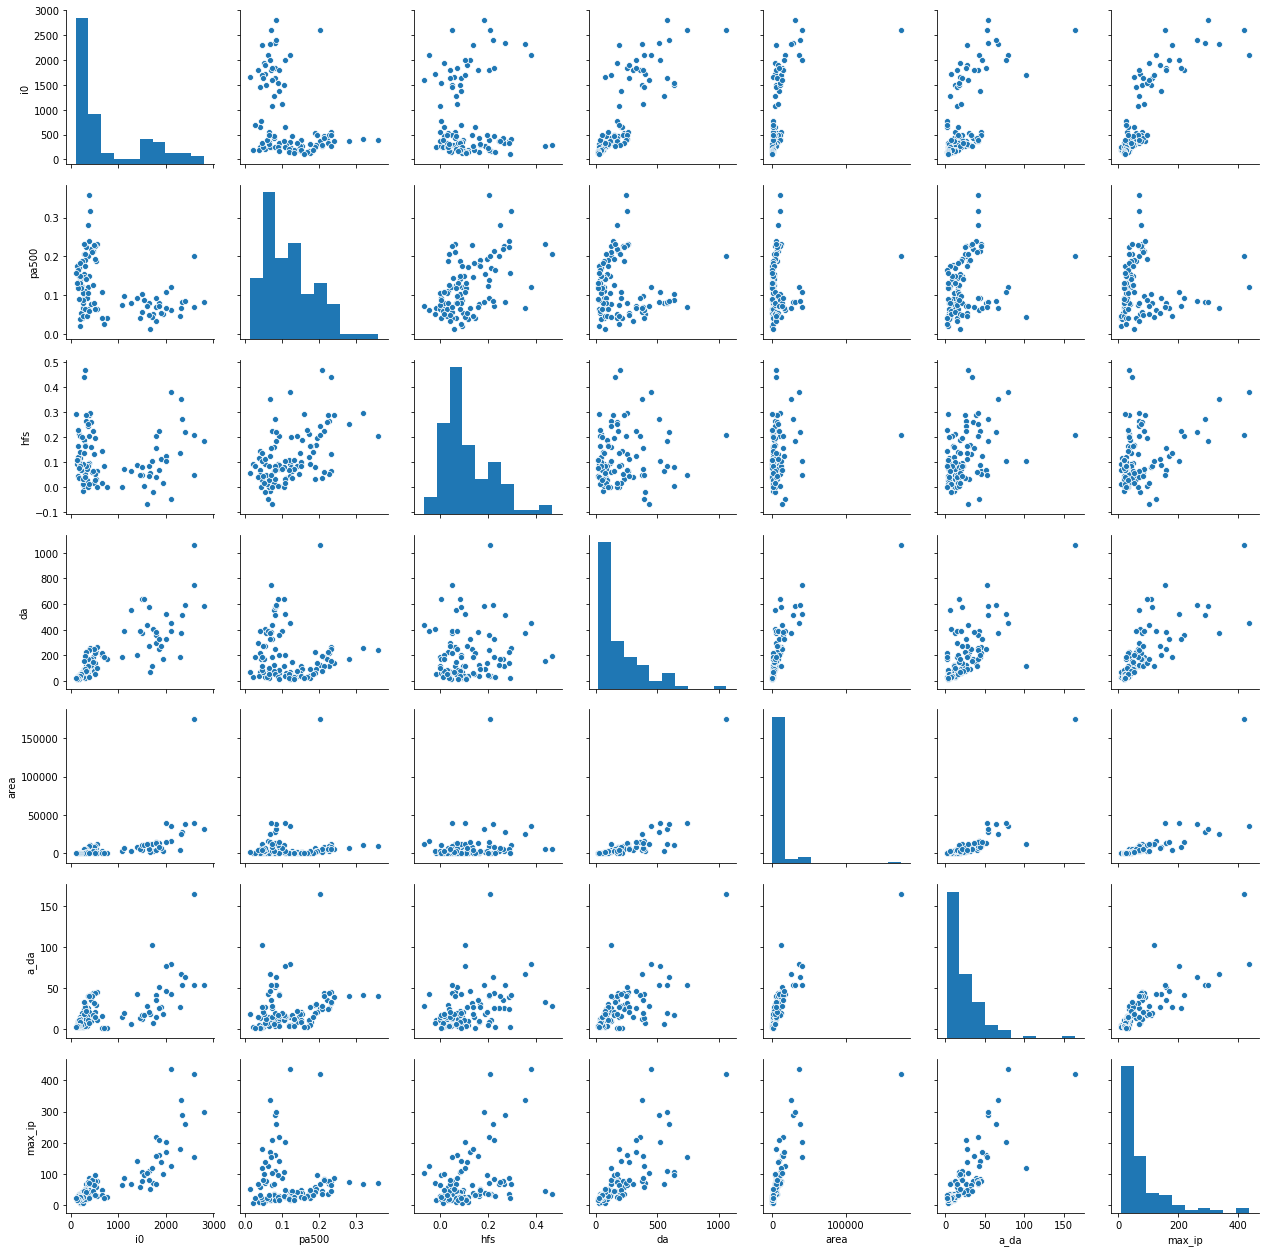

In [42]:
df_plot = df[['new_class', 'i0', 'pa500', 'hfs', 'da', 'area', 'a_da', 'max_ip']]
sns.pairplot(df_plot)

In [47]:
# colors = ("red", "green", "blue")
# for x in df_plot:
#     for y in df_plot:
#         plt.scatter(x,y,c=colors,label=df.new_class)

Conduct further exploratory data analysis of your own choosing

For example...

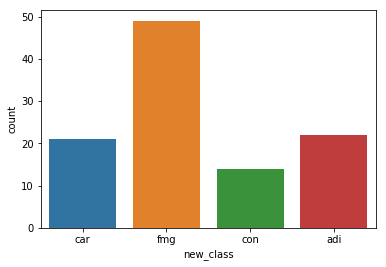

In [56]:
sns.countplot(x='new_class',data=df_plot)

In [61]:
# sns.scatterplot(x='new_class',y=df.count(),data=df_plot)

In [62]:
df.describe()

,i0,pa500,hfs,da,area,a_da,max_ip,dr,p
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


Data Transformation: Convert the values of "new_class" to numerical values using the LabelEncoder

In [64]:
##Using the label encode to create a new column called "new_class_labels" from "new_class"
new_class = LabelEncoder()
df["new_class_labels"] = new_class.fit_transform(df['new_class'])
df.sample(10)

,i0,pa500,hfs,da,area,a_da,max_ip,dr,p,new_class,new_class_labels
67,145.000000,0.117635,0.110305,21.218942,82.455562,3.885941,20.303082,6.166715,162.510927,fmg,3
98,2329.840138,0.066148,0.353255,377.253368,25369.039925,67.246689,336.075165,171.387227,2686.435346,adi,0
80,1111.814068,0.098786,0.071209,386.987094,7659.742134,19.793275,86.025124,377.304504,990.978913,con,2
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,car,1
28,200.000000,0.037699,0.117286,42.316675,220.810907,5.218059,10.675764,40.947882,218.034313,fmg,3
96,1650.000000,0.047647,0.043284,274.426177,5824.895192,21.225727,81.239571,262.125656,1603.070348,adi,0
79,1496.736054,0.103847,0.082380,640.275950,11071.997798,17.292540,108.286919,631.052482,1178.274278,con,2
91,2350.000000,0.081507,0.271573,515.289477,27758.640261,53.869992,289.569061,426.231160,2457.676736,adi,0
25,243.293976,0.039968,0.067021,68.544778,383.928453,5.601134,9.991348,67.816656,263.640761,fmg,3
35,144.000000,0.120602,0.046077,19.647670,70.426239,3.584458,18.131014,7.569493,160.373770,fmg,3


In [69]:
#Before you execute this cell, assess if it's important in this case to
## convert the target variable to one-hot encoding
new_class = OneHotEncoder()
arr = new_class.fit_transform([df["new_class_labels"]])
df.sample(5)
# arr.data

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,i0,pa500,hfs,da,area,a_da,max_ip,dr,p,new_class,new_class_labels
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814,car,1
33,301.304399,0.109781,0.035605,64.616200,942.773191,14.590353,29.045677,57.720030,335.768459,fmg,3
62,178.000000,0.149575,0.099135,40.290621,474.404699,11.774569,25.920828,30.845499,209.180738,fmg,3
45,121.000000,0.174184,0.090757,24.437180,144.466513,5.911750,22.021080,10.594708,141.766185,fmg,3
27,250.000000,0.068068,-0.015359,57.172431,652.901349,11.419863,17.776981,55.791270,278.308615,fmg,3


In [78]:
## Import standard scaler and standardize all numeric variables(which are not target variables)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df.loc[:,["i0" ,"pa500" ,"hfs" ,"da","area" ,"a_da" ,"max_ip" ,"dr","p" ,"new_class_labels"]] = scaler.fit_transform(df.drop(columns='new_class'))
df.sample()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,i0,pa500,hfs,da,area,a_da,max_ip,dr,p,new_class,new_class_labels
96,1.153738,-1.061714,-0.707924,0.441589,-0.081669,-0.096715,0.072359,0.528755,1.043482,adi,-1.526228


## Checkpoint: Before you move past this point, assess if there are any more data pre-processing activities you can do before you start modelling

### Modelling the data

Splitting the df dataframe into train and test

In [88]:
x_train, x_test, y_train, y_test  = train_test_split(df.drop(columns=['new_class','new_class_labels']),df.new_class_labels,test_size=.20,random_state=5)

In [92]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
df.shape

(84, 9) (22, 9)
(84,) (22,)


(106, 11)

In [95]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
# rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Unknown label type: 'continuous'

In [ ]:
##making predictions using the RnadomForest regression model
y_pred=logreg.predict(x_test)

In [ ]:
##making predictions using the decision tree classifier
y_pred=logreg.predict(x_test)

### Evaluating the model

In [ ]:
##Evaluating the Accuracy RandomForest Model
metrics.accuracy_score(y_test,y_pred)

##Evaluating the DecisionTreeClassifier Model
metrics.accuracy_score(y_test,y_pred)

In [ ]:
##Plot the confusion matrix for the RandomForest Model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=df,columns=['c1', 'c2'])

plt.figure(figsize = (8,5))
s.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
##Plot the confusion matrix for the DecisionTreeClassifier
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=df,columns=['c1', 'c2'])
plt.figure(figsize = (8,5))
s.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
##Print the faeture importances of the RandomForest Model
print(rf.feature_importance)